In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

df = pd.read_csv(r'C:\Users\acer\Desktop\6th sem project\Datasets\student_satisfaction_survey.csv')

In [2]:
df

,Unnamed: 0,specific_ut_college,credit_hours,year_at_UT,sleep_hours,happiness_scale
0,0,School of Information,12,2,6.0,7
1,1,McCombs School of Business,13,1,8.0,5
2,2,College of Natural Science,15,1,7.0,5
3,3,School of Information,15,3,4.0,3
4,4,Moody College of Communication,12,1,7.0,8
5,5,School of Information,12,1,6.0,7
6,6,Moody College of Communication,12,1,13.0,3
7,7,College of Natural Science,14,1,6.5,5
8,8,College of Natural Science,14,2,4.0,8
9,9,McCombs School of Business,12,1,6.0,10


In [31]:
print(df.columns)

Index(['Unnamed: 0', 'specific_ut_college', 'credit_hours', 'year_at_UT',
       'sleep_hours', 'happiness_scale', 'preprocessed_feedback', 'Sentiment'],
      dtype='object')


In [15]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [26]:
df['preprocessed_feedback'] = df['specific_ut_college'].apply(preprocess_text)

In [27]:
print(df['preprocessed_feedback'].head())

0          school inform
1     mccomb school busi
2    colleg natur scienc
3          school inform
4    moodi colleg commun
Name: preprocessed_feedback, dtype: object


In [12]:
positive_threshold = 7
negative_threshold = 4

In [29]:
df['Sentiment'] = pd.cut(df['happiness_scale'], bins=[0, negative_threshold, positive_threshold, float('inf')], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = df['Sentiment'].value_counts()

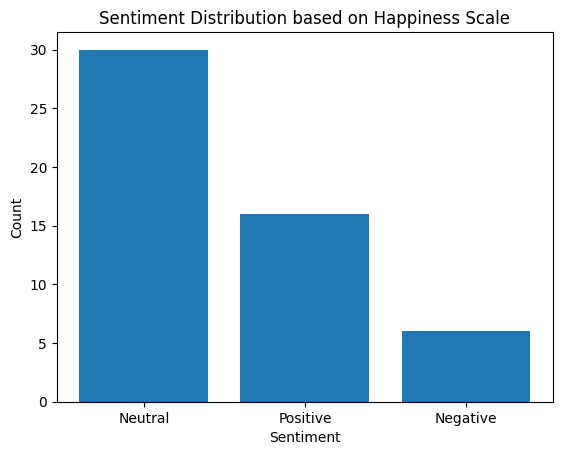

In [30]:
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution based on Happiness Scale')
plt.show()